In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Experiment 1: Single Agent task (what is $p(s|e)$?)

In [2]:
steps=7

In [3]:
#To marginalize on s, sum over 0 axis, leeaving the p axis

def runTAAndPlot(title,game):
    global p_e_s
    global p_s
    
    p_e_temp = np.array([.45,.55])
    
    p_s_e = []
    p_s   = []
    p_e   = []

    for step in range(1,steps):

        #Step 1: Create, normalize joint
        joint  = p_e_s*p_s_temp[:,np.newaxis]
        joint /= np.sum(joint)

        for tt in range(step-1):
            joint*=p_e_s
            joint/=np.sum(joint)

        #Step 2: Generate posterior
        p_e_marg = np.sum(joint,axis=0)
        post =np.divide(p_e_s*p_s_temp[:,np.newaxis],p_e_marg)
        post /= np.sum(post,axis=0)

        for tt in range(step-1):
            post*=(p_e_s/p_e_marg)
            post /= np.sum(post,axis=0)
        
        p_s_e.append(post)  #posterior P(S|E)

        p_s_unnormed =np.sum(post*p_e_temp,axis=1)
        p_s.append(p_s_unnormed/np.sum(p_s_unnormed))

    
        p_e.append(p_e_temp)
            
    pse_time = np.transpose(p_s_e,(1,2,0))

    clrs = [['#501669','#501669'],['#EB9437','#EB9437']]
    stls = [['dashed','solid'],['dashed','solid']]

    lbls=None;mlbs=None;
    
    if game=='c':
        lbls = [[['0','0'],['0','1']],[['1','0'],['1','1']]]
        mlbs = ['0','1']
    if game=='p':
        lbls = [[['D','D'],['D','C']],[['C','D'],['C','C']]]
        mlbs = ['D','C']
    
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=[4,6])
            
    x=np.linspace(1,steps,steps-1)

    for pp,lbl,clr,stl in zip(pse_time,lbls,clrs,stls):
        for p,l,c,s in zip(pp,lbl,clr,stl):
            ax1.plot(x,p,label=r'$P(s=$'+l[0]+r'$|e=$'+l[1]+r'$)$',color=c,linestyle=s,linewidth=3,alpha=.75)

    ax2.plot(x,np.transpose(p_e)[1],color='#501669', label=r'$P(e=$'+mlbs[1]+'$)$')
    ax2.plot(x,np.transpose(p_s)[1],color='#EB9437',label=r'$P(s=$'+mlbs[1]+'$)$')
    ax2.plot(x,np.transpose(p_e)[0],color='#501669',linestyle='dashed', label=r'$P(e=$'+mlbs[0]+'$)$')
    ax2.plot(x,np.transpose(p_s)[0],color='#EB9437',linestyle='dashed',label=r'$P(e=$'+mlbs[0]+'$)$')
    ax1.set_xlabel("Steps");ax1.set_ylabel('Probability');ax2.set_ylabel('Probability')
    ax1.grid();ax2.grid()
    # ax1.legend(framealpha=1);ax2.legend()
    plt.tight_layout()
    plt.savefig(title+".pdf")

def genNormedDistr(pris):
    norm = np.sum(pris,axis=1)
    pris = pris/norm[:,np.newaxis]
    return pris

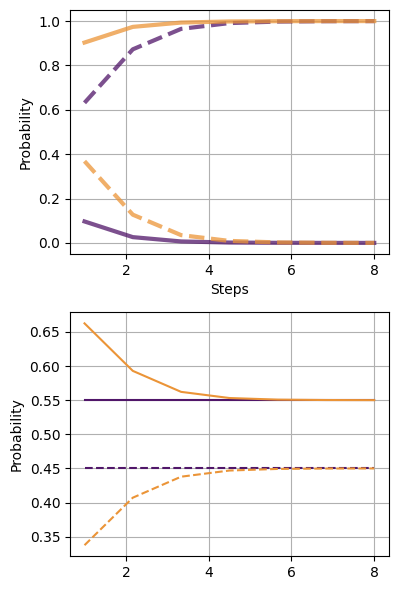

In [4]:
A=1
p1=.8
steps=8
p_e_s = [[p1,1-p1],[1-p1,p1]]
ps=.3
p_s_temp=np.array([ps,1-ps])
runTAAndPlot("standardchoicegameHOMO",'c')

$P<L<R<W$

$R+L=W+P$

$2R>W+P$

Prisoners Dilemma, [[L,P],[W,R]]
 [[2 7]
 [1 6]]


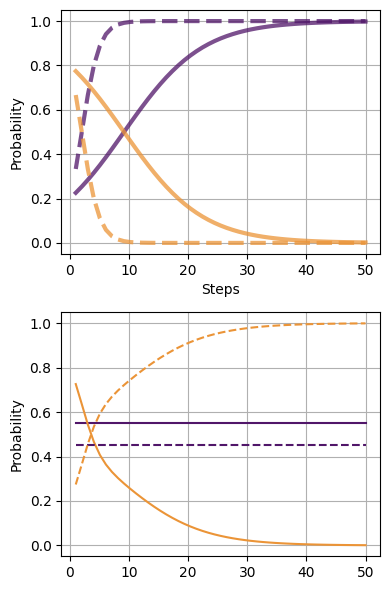

In [5]:
p1=.8
R=6
L=2
P=1
W=7

steps=50
print("Prisoners Dilemma, [[L,P],[W,R]]\n",np.array([[L,W],[P,R]]))
# p_e_s=genNormedDistr(np.array([[L,W],[P,R]]))
p_e_s=np.array([[L,W],[P,R]])
ps=.2
p_s_temp=np.array([ps,1-ps])
runTAAndPlot("PDGame",'p')

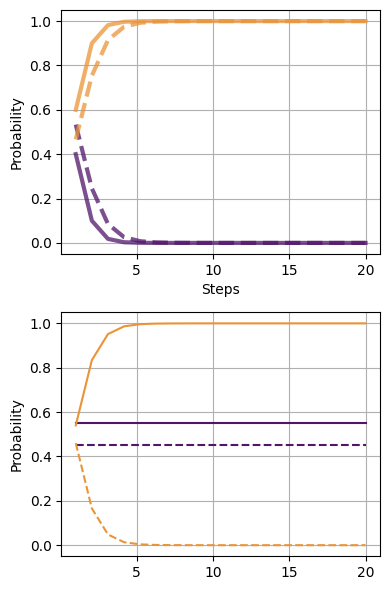

In [6]:
steps=20
R=6
L=2
P=1
W=7
p_e_s=genNormedDistr(np.array([[L,P],[W,R]]))
p_e_s=np.array([[L,P],[W,R]])
ps=.8
p_s_temp=np.array([ps,1-ps])
runTAAndPlot("TOCGame",'p')

In [7]:
R=6.
L=2.
P=1.
W=7.
steps=50

pris = np.array([[[L,P],[W,R]],[[L,W],[P,R]]])

In [8]:
SAMPLES = 1000

def runPDMix(title,pS2,pE_curr=[0,1]):

    A=1
    ps=.5
    p_s_temp=np.array([ps,1-ps])
    p_e_temp = pS2

    data = []
    envs = []

    #Generates environment sequences
    for i in range(SAMPLES):
        data.append(np.random.choice([0,1], size=steps, p=pE_curr))
        envs.append([pris[d] for d in data[-1]])
    pcurve = []
    mcurve = []

    for env,d in zip(envs,data):

        p_s_e = []
        p_s   = []
        p_e   = []
        joint = []
        p_e_marg = []

        #ATTEMPT 3
        likelihood = np.cumprod(env,axis=0)
        numerator = likelihood*p_s_temp[:,np.newaxis]
        # print(numerator[:3])
        denominator = np.sum(numerator,axis=1)
        # print(denominator[:3])
        
        p_s_e = [n/d for n,d in zip(numerator,denominator)]

        # print(p_s_e[:3])
        # input()
        
        for post,i in zip(p_s_e,range(len(p_s_e))):    

            j = post*p_e_temp
            p_s_unnormed =np.sum(j,axis=1)
            p_s.append(p_s_unnormed/np.sum(p_s_unnormed))
    
        
            p_e.append(p_e_temp)
        
        pcurve.append(p_s_e)
        mcurve.append(p_s)

    return pcurve,mcurve,p_e,np.transpose(p_s)

#Processes and plots the mixed game 
def ProcAndPlotPDANDPT(title,pcurve,mcurve,p_e,plot=True):
    
    # break up mean into 4 parts to reduce noise 
    # pcurve=[np.mean(pcurve[0:int(SAMPLES/4)],axis=0),np.mean(pcurve[int(SAMPLES/4):2*int(SAMPLES/4)],axis=0),\
    #         np.mean(pcurve[2*int(SAMPLES/4):3*int(SAMPLES/4)],axis=0),np.mean(pcurve[3*int(SAMPLES/4):SAMPLES],axis=0)]

    mntraj=np.transpose(np.mean(pcurve,axis=0),(1,2,0))
    lnmntraj=np.transpose(np.mean(np.log(pcurve),axis=0),(1,2,0))
    mntstraj=np.transpose(np.mean(np.log(mcurve),axis=0),(1,0))
    
    if plot:
    
        fig, (ax1, ax2) = plt.subplots(2,1,figsize=[4,6])
    
        clrs1 = [['#501669','#501669'],['#EB9437','#EB9437']]
        clrs = [['#4e4054','#4e4054'],['#e0bd96','#e0bd96']]
        stls = [['dashed','solid'],['dashed','solid']]
        lbls = [[['D','D'],['D','C']],[['C','D'],['C','C']]]
        
        for p_s_e,p_s,i in zip(pcurve,mcurve,range(SAMPLES)):          
            pse_time = np.transpose(p_s_e,(1,2,0))
            
            x=np.linspace(1,steps,steps)
    
            # for pp,lbl,clr,stl in zip(pse_time,lbls,clrs,stls):
            #     for p,l,c,s in zip(pp,lbl,clr,stl):
            #         ax1.plot(x,p,color=c,linestyle=s,linewidth=1,alpha=.3)
    
        for mn,clr,stl,lbl in zip(mntraj,clrs1,stls,lbls):
            for m,c,s,l in zip(mn,clr,stl,lbl):
                ax1.plot(x,m,color='w',linestyle=s,linewidth=4.5)
                ax1.plot(x,m,color=c,linestyle=s,linewidth=3,label=r'$P(s=$'+l[0]+r'$|e=$'+l[1]+r'$)$',alpha=.8)
    
    
    
        ax2.plot(x,np.transpose(p_e)[1],color='#501669', label=r'$P(e=C)$')
        ax2.plot(x,np.transpose(p_s)[1],color='#EB9437',label=r'$P(s=C)$')
        ax2.plot(x,np.transpose(p_e)[0],color='#501669',linestyle='dashed', label=r'$P(e=D)$')
        ax2.plot(x,np.transpose(p_s)[0],color='#EB9437',linestyle='dashed',label=r'$P(s=D)$')
        ax2.set_xlabel("Steps");ax1.set_ylabel('Probability');ax2.set_ylabel('Probability')
        ax1.grid();ax2.grid()
        ax1.legend();
        ax2.legend()
        plt.tight_layout()
        plt.savefig(title+".pdf")
    # return mntraj,mntstraj
    return lnmntraj

In [9]:
pE=[.25,.75]
pS2 = np.array([.5,.5])
pc,mc,p_e_PDMix,p_s_PDMIX = runPDMix('mixedGameCoop',pS2,pE)


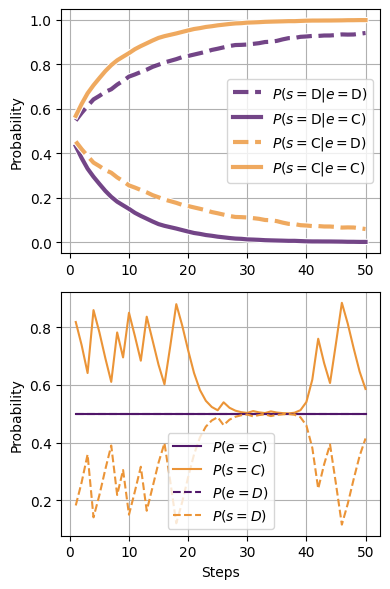

In [10]:
mnt,mnts = ProcAndPlotPDANDPT('mixedGameCoopUNBALANCED',pc,mc,p_e_PDMix,True) 

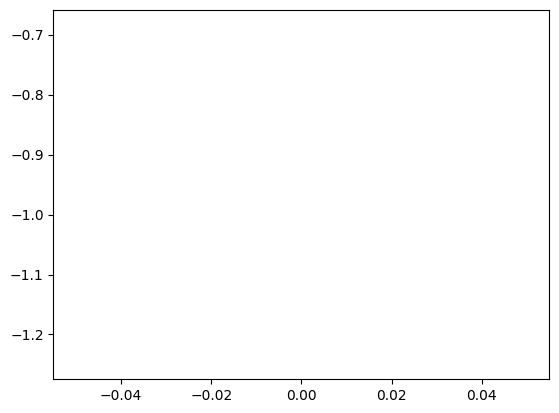

In [11]:
plt.plot(mnt[0][0])
plt.plot(mnt[0][1])
plt.plot(mnt[1][1])
plt.plot(mnt[1][1])

In [12]:
mnts

array([[-8.70689164e-01, -1.05504616e+00, -1.23526819e+00,
        -1.43387907e+00, -1.62300929e+00, -1.80139706e+00,
        -1.97217701e+00, -2.16512048e+00, -2.36673840e+00,
        -2.58962603e+00, -2.74952813e+00, -2.92435963e+00,
        -3.10466382e+00, -3.28971309e+00, -3.47485323e+00,
        -3.67320299e+00, -3.88271683e+00, -4.10817658e+00,
        -4.30572434e+00, -4.45944482e+00, -4.61718182e+00,
        -4.78768634e+00, -4.95948820e+00, -5.18057984e+00,
        -5.35996166e+00, -5.57584721e+00, -5.75968584e+00,
        -5.92030723e+00, -6.09507672e+00, -6.27454354e+00,
        -6.50427487e+00, -6.68057391e+00, -6.84441902e+00,
        -7.06570414e+00, -7.28834090e+00, -7.51358644e+00,
        -7.74986625e+00, -7.90992475e+00, -8.11050380e+00,
        -8.26182826e+00, -8.46692007e+00, -8.67685089e+00,
        -8.89701789e+00, -9.07883831e+00, -9.25912972e+00,
        -9.52844488e+00, -9.72157731e+00, -9.91858817e+00,
        -1.01099776e+01, -1.03594823e+01],
       [-6.06

In [13]:
info = np.transpose([np.divide(m,s[:,np.newaxis]) for m,s in zip(np.transpose(mnt,(2,0,1)),np.transpose(mnts,(1,0)))],(1,2,0))

ValueError: axes don't match array

In [14]:
joint = np.transpose([m*(pS2) for m in np.transpose(mnt,(2,0,1))],(1,2,0))

ValueError: axes don't match array

In [15]:
INFO=np.sum(np.sum((joint)*np.log(info),axis=0),axis=0)

NameError: name 'joint' is not defined

In [16]:
for i,j in zip(info,joint):
    for ii,jj in zip(i,j):
        plt.plot(jj,label='joint')
        plt.plot(ii,label='info')
        plt.legend()
        plt.show()

NameError: name 'info' is not defined

$H(S_1;S_2)$

In [17]:
CONDENT=-np.sum(np.sum(joint*np.log(mnt),axis=0),axis=0)

NameError: name 'joint' is not defined

In [18]:
plt.plot(CONDENT)

NameError: name 'CONDENT' is not defined

## This code block compares the fixation rates from the simulations to theoretical calculation.

The outer function plots the mean of the log of the trajectories. The inner fucntion computes the theoretical calculation. The plot shows that the functional form of the fixation process is predictable by theory

In [19]:


#Computes and plots the log probability, and fits to power law 
def plotPowerLawPDMix(title,mntraj,pS):

    #The first value of val is the row, the second is the column
    def computeTheoreticalRate(val,x,pS):

        i0   = val[0]
        o0   = (i0+1)%2
        i1   = val[1]                        #selects proper index of likelihood
        o1   = (i1+1)%2
    
        # First dimension of env
        l000 = pris[0][i0][i1]; l001 = pris[1][i0][i1]               #retrieves likelihood by (row,col),(other row,col),e0
        l010 = pris[0][o0][i1]; l011 = pris[1][o0][i1]                #retrieves likelihoods, e1
    
        l0=l000**pE[0]*l001**pE[1]
        l1=l010**pE[0]*l011**pE[1]
    
        cof = (l1**x)/(l0**x+l1**x)                #computes dynamical (but equilibrating) coefficient 
        a = pE[0]*np.log(l000/l010)
        b = pE[1]*np.log(l001/l011)
       
        return cof*(a+b)   #computes contribution to the rate
    
    fig, (ax1) = plt.subplots(1,1,figsize=[5,3])

    #Matrix elements of the conditional agent strategy, averaged 
    c00,c01,c10,c11 = mntraj[0,0],mntraj[0,1],mntraj[1,0],mntraj[1,1]

    x=np.linspace(1,steps,steps)

    #Conditionals ensure that we are only plotting convergence to zero
    if (c00[1]-c00[0])<0:
        plt.plot(computeTheoreticalRate([0,0],x,pS)*x)
        ax1.plot(c00,label=r'$P(s=D|e=D)$',color='#EB9437',linestyle='dashed',linewidth=3)
        m,y = np.polyfit(x, np.log(c00), 1)
    if (c01[1]-c01[0])<0:
        plt.plot(computeTheoreticalRate([0,1],x,pS)*x,color='k')
        ax1.plot(c01,label=r'$P(s=D|e=C)$',color='#501669',linestyle='solid', linewidth=3)
        m,y = np.polyfit(x, np.log(c01), 1)
    if (c10[1]-c10[0])<0:
        plt.plot(computeTheoreticalRate([1,0],x,pS)*x)
        ax1.plot(c10,label=r'$P(s=C|e=D)$',color='#EB9437',linestyle='dashed',linewidth=3)
    if (c11[1]-c11[0])<0:
        plt.plot(computeTheoreticalRate([1,1],x,pS)*x,color='k')
        ax1.plot(c11,label=r'$P(s=C|e=C)$',color='#501669',linestyle='solid', linewidth=3)

    ax1.set_ylabel('Log Probability')
    ax1.set_xlabel('steps')
    plt.grid()
    plt.legend()

IndexError: invalid index to scalar variable.

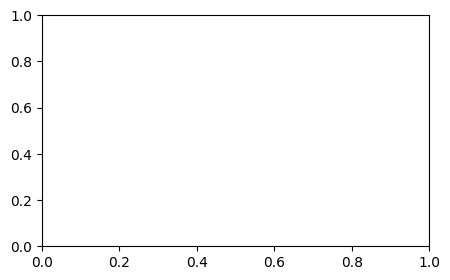

In [20]:
plotPowerLawPDMix('powerlawMixedGame',mnt,p_s_PDMIX)

## This code block extracts a fixation rate from the trajectories plotted in the previous section. 

Trajectories are computed from a spectrum of $p_e$ values. A convergence rate is extracted from the data and plotted. This rate is compared to a theoretically calculated rate. 

In [21]:
#The first value of val is the row, the second is the column
def computeRate(val,pE):
    i0   = val[0]
    o0   = (i0+1)%2
    i1   = val[1]                        #selects proper index of likelihood
    o1   = (i1+1)%2

    # First dimension of env
    l000 = pris[0][i0][i1]; l001 = pris[1][i0][i1]               #retrieves likelihood by (row,col),(other row,col),e0
    l010 = pris[0][o0][i1]; l011 = pris[1][o0][i1]                #retrieves likelihoods, e1

    a = pE[0]*np.log(l000/l010)
    b = pE[1]*np.log(l001/l011)

    l0=l000**pE[0]*l001**pE[1]
    l1=l010**pE[0]*l011**pE[1]
    x=np.linspace(1,steps,steps)
    cof = (l1**x)/(l0**x+l1**x)                #computes dynamical (but equilibrating) coefficient 
    
    return (cof*(a+b))[-1]   #computes contribution to the rate

In [22]:
#Computes fixation time coefficients
def computePowerLaws(mntraj,ANTI):

    x=np.linspace(1,steps,steps)
    if ANTI:
        None
    #     m00,y00 = np.polyfit(x, np.log(1-mntraj)[0][0]), 1)
    #     m01,y01 = np.polyfit(x, np.log(1-mntraj)[0][1]), 1)
    #     m10,y10 = np.polyfit(x, np.log(1-mntraj)[1][0]), 1)
    #     m11,y11 = np.polyfit(x, np.log(1-mntraj)[1][1]), 1)

    else:
        m00,y00 = np.polyfit(x, mntraj[0][0], 1)
        m01,y01 = np.polyfit(x, mntraj[0][1], 1)
        m10,y10 = np.polyfit(x, mntraj[1][0], 1)
        m11,y11 = np.polyfit(x, mntraj[1][1], 1)

    return m00,m01,m10,m11

In [23]:
def plotConvTimes(cts,X):

    fig, (ax1) = plt.subplots(1,1,figsize=[7,5])
        
    cts = np.transpose(cts)

    clrs = [pcolor[2],pcolor[2],ycolor[2],ycolor[2]]
    stls = ['dotted','solid','dotted','solid']
    lbls = [['D','D'],['D','C'],['C','D'],['C','C']]
    inds = [[0,0],[0,1],[1,0],[1,1]]

    XX=np.linspace(0,1,100)
    
    for cc,c,s,l,ii in zip(cts,clrs,stls,lbls,inds):
        plt.plot(X,cc,color=c,linestyle=s,label=r'$\langle P(s=$'+l[0]+r'$|e=$'+l[1]+r'$)\rangle_n$',linewidth=5,alpha=.8)
        plt.plot(XX,[computeRate(ii,[e,1-e]) for e in XX],color='k',linestyle='dotted',linewidth=2,alpha=1)
    plt.xlabel(r"$P(e=0)$");plt.ylabel(r'Fixation Rate ($N^{-1}$)');
    plt.legend();plt.grid();plt.tight_layout()
    plt.ylim(top=.01)
    
    y1=[-2,-2]
    y2=[0,0]
    p1=.125;p2=.5
    x1=np.linspace(0, p1, 2); x2=np.linspace(p1,p2, 2); x3=np.linspace(p2,1, 2)

    plt.fill_between(x1, y1, y2, color=pcolor[0], alpha=0.2,zorder=1)
    plt.fill_between(x2, y1, y2, color='black', alpha=0.1,zorder=1)
    plt.fill_between(x3, y1, y2, color='#e0bd96', alpha=0.2,zorder=1)

    plt.text(.01,-1.25, "D Phase", fontsize=14)
    plt.text(.25,-1.25, "Mixed", fontsize=14)
    plt.text(.6,-1.25, "C Phase", fontsize=14)

    plt.axvline(.5, linewidth=2,color=ycolor[0],zorder=0,alpha=.4)
    plt.axvline(.125, linewidth=2,color=pcolor[0],zorder=0,alpha=.4)


    plt.ylim(bottom=-2)
    plt.xlim(left=0,right=1)
    plt.tight_layout()
    plt.savefig("fixationRateAnti.pdf")

In [24]:
def testConv(X,flip):

    convtimes=[]
    for xx in X:
        temp_pE=[xx,1-xx]

        pc,mc,p_e_PDMix,p_s_PDMix = runPDMix('mixedGameCoop',pS2,temp_pE)
        
        mnt = ProcAndPlotPDANDPT('mixedGameCoopUNBALANCED',pc,mc,p_e_PDMix,flip) 
        convtimes.append(list(computePowerLaws(mnt,flip)))
    return convtimes

In [1543]:
domain = np.linspace(0,1,50)
cts = testConv(domain,False)

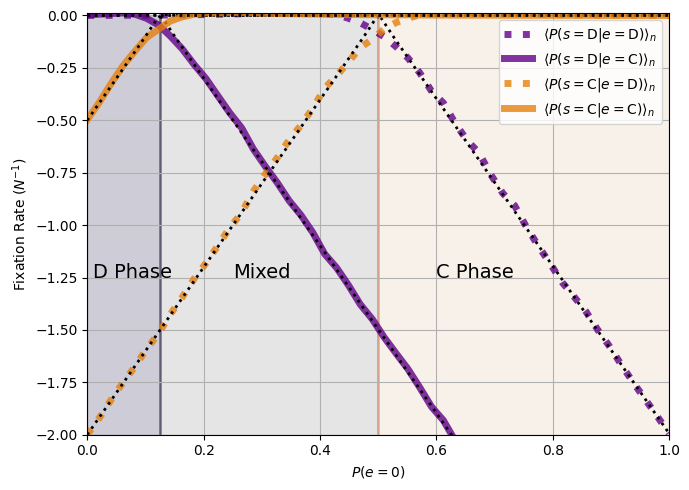

In [1588]:
plotConvTimes(cts,domain)

In [239]:
PS2 = np.flip(np.linspace(0,1,25))
vals = []
for ps1 in np.flip(PS2):
    vals.append([])
    for ps2 in (PS2):
        p2= np.array([ps2,1-ps2])
        p1= np.array([ps1,1-ps1])
        vals[-1].append(np.sum((np.log(pris[1]))*p2*p1[:,np.newaxis]))



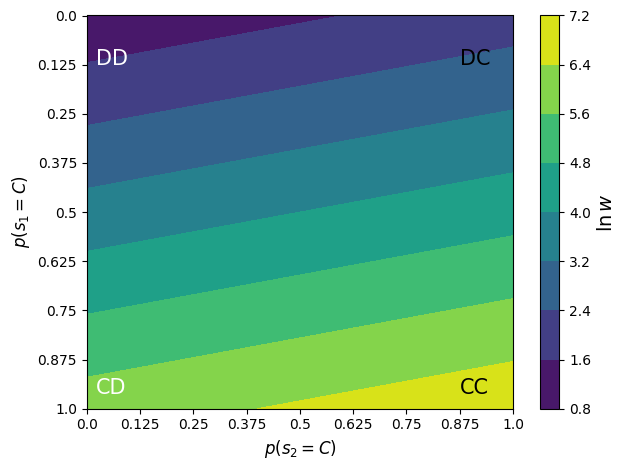

In [242]:
fig, ax = plt.subplots()
lvls= [1,2,3,4,5,6,7,8]
im=plt.contourf(vals)
plt.xlabel(r'$p(s_2=C)$',fontsize=12); plt.ylabel(r'$p(s_1=C)$',fontsize=12);

# # Add text boxes in the four corners
ax.text(0.5, 0.9, 'CD', size=15, color='w')
ax.text(0.5, 21, 'DD', size=15, color='w')
ax.text(21, 0.9, 'CC', size=15, color='k')
ax.text(21, 21, 'DC', size=15, color='k')


plt.xticks((PS2*24)[::3], np.round(PS2,3)[::3])
plt.yticks((np.flip(PS2)*24)[::3], np.round(PS2,3)[::3])



cb=plt.colorbar()
cb.set_label(r'$\ln w$',fontsize=14)

plt.tight_layout()

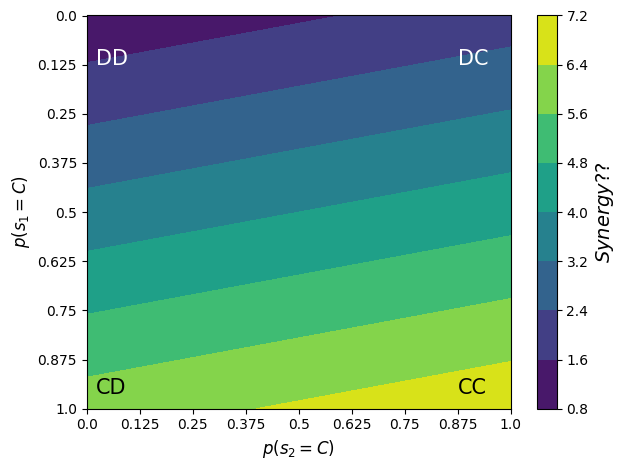

In [241]:
vals = []

for ps2 in np.flip(PS2):
    vals.append([])
    for ps1 in np.flip(PS2):
        p2= np.array([ps2,1-ps2])
        p1= np.array([ps1,1-ps1])
        vals[-1].append(np.sum(((pris[1]))*p2*p1[:,np.newaxis]))

fig, ax = plt.subplots()
lvls= [1,2,3,4,5,6,7,8]
im=plt.contourf(vals)
plt.xlabel(r'$p(s_2=C)$',fontsize=12); plt.ylabel(r'$p(s_1=C)$',fontsize=12);

# # Add text boxes in the four corners
ax.text(0.5, 0.9, 'CD', size=15, color='k')
ax.text(0.5, 21, 'DD', size=15, color='w')
ax.text(21, 0.9, 'CC', size=15, color='k')
ax.text(21, 21, 'DC', size=15, color='w')


plt.xticks((PS2*24)[::3], np.round(PS2,3)[::3])
plt.yticks((np.flip(PS2)*24)[::3], np.round(PS2,3)[::3])



cb=plt.colorbar()
cb.set_label(r'$Synergy$??',fontsize=14)

plt.tight_layout()

In [25]:
R=1.6487202567
L=1
W=2.7182818285
P=0.1353352832
PW=P*W

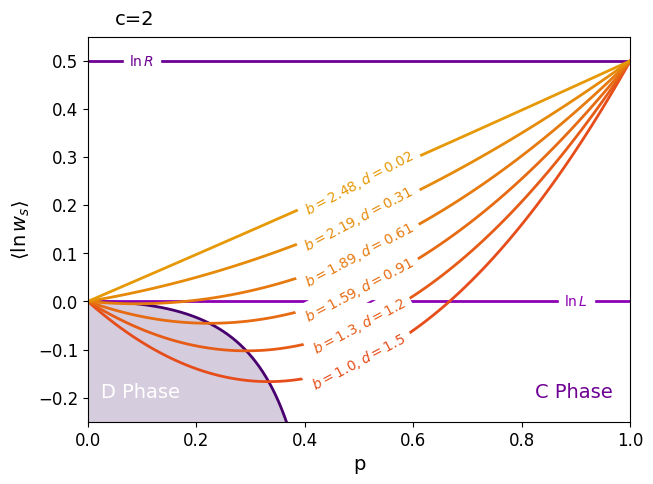

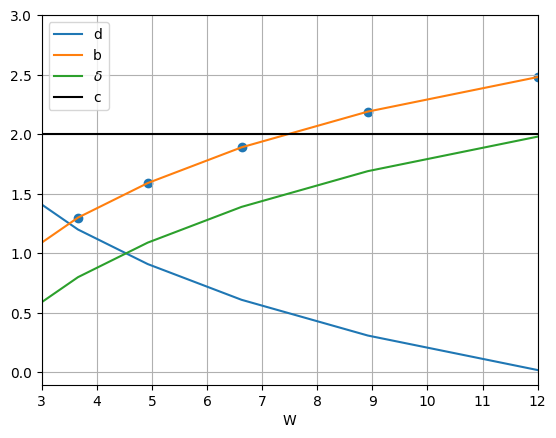

In [29]:
#this code generates the effective fitness curves. 
# b=1, d=1.5, c=2, δ are expressed in terms of the fitness matrix from the paper.
# Here, we vary W, compute the curves as well a track the b,c,d as W is varied. Then we plot and show 
X=np.linspace(0,1,100)

fig, (ax1) = plt.subplots(1,1,figsize=[7,5])

#Varying W
vals = np.exp(np.linspace(1,np.log(12),6))
#Tracking coefficients as W is varied, and generating appropriate labels
Bs = [np.round(np.log(v/L),2) for v in vals]
blabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Cs = [np.round(np.log(L/P),2) for v in vals]
# clabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Ds = [np.round(np.log(R*L/(P*v)),2) for v in vals]
dlabels = [r'$,d=$'+str(D) for D in Ds]+[r'$\ln L$',r'$\ln R$']
Dels = [np.round(np.log(v/R),2) for v in vals]

#Plot aesthetics
line_order = [.9,.1]+[.5 for i in vals]
pcolor=[(i-.15,0,i) for i in np.linspace(.1,.7,6)]
ycolor=[(.9,i-.1,.2-i/4) for i in np.linspace(.4,.7,6)]

#Plotting the fitness boundaries
plt.axhline(np.log(L),color='k',zorder=1,label=r'$\ln L$',c=pcolor[-1],linewidth=2)
plt.axhline(np.log(R),color='k',zorder=1,label=r'$\ln R$',c=pcolor[4],linewidth=2)

#Plotting the fitness as a function of p
for W,bl,dl,c in  zip(vals,blabels,dlabels,ycolor): 

    pris  = np.array([[[L,P],[W,R]],[[L,W],[P,R]]])
    #Fancy way of computation
    Y=[np.sum(np.log(pris[0])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]])\
              +np.log(pris[1])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]]))/2 for PP in X]
    #Direct from equation
    # Y=[PP**2*np.log(R*L/(W*P))+PP*np.log(W*P/(L**2))+np.log(L) for PP in X]
    plt.plot(X,Y,label=bl+dl,color=c,linewidth=2)


lines = plt.gca().get_lines()
labelLines(lines)


#PLOTTING THE FILL REGIONS 
opti_domain = np.exp(np.linspace(np.log(.005),np.log(10),1000))
pstar = np.array([-np.log(WW*P/L**2)/(2*np.log(R*L/(WW*P))) for WW in opti_domain])
ystar = np.array([PS**2*np.log(R*L/(WW*P))+PS*np.log(WW*P/L**2)+np.log(L) for PS,WW in zip(pstar,opti_domain)])
plt.plot(pstar,ystar,zorder=0,color=pcolor[3],linewidth=2)
plt.fill_between(pstar, [-.4 for i in pstar], ystar, color=pcolor[2], alpha=0.2)

#Labels
plt.text(.825, -.2, 'C Phase', size=14, color=pcolor[4])
plt.text(.025, -.2, 'D Phase', size=14, color='w')
plt.text(.05, .575, 'c=2', size=14, color='k')


plt.ylim(-.25,.55)
plt.xlim(0,1)
plt.xlabel(r'p',fontsize=14)
plt.ylabel(r'$\langle \ln w_s \rangle $',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("phase_diagram.pdf")
plt.show()
plt.plot(vals,Ds,label='d')
plt.plot(vals,Bs,label='b')
plt.scatter(vals,Bs)
plt.plot(vals,Dels,label=r'$\delta$')
plt.plot(vals,Cs,label='c',color='k')
plt.xlabel("W")
plt.xlim(left=3,right=vals[-1])

plt.ylim(top=3)
plt.legend()
plt.grid()
plt.show()

In [22]:
R=1.6487202567
L=1
W=2.7182818285
P=0.1353352832
PW=P*W

0.0
0.0
0.0
0.0
0.0


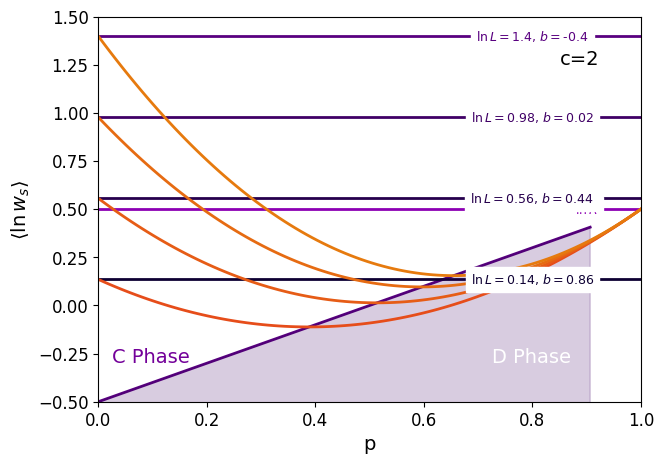

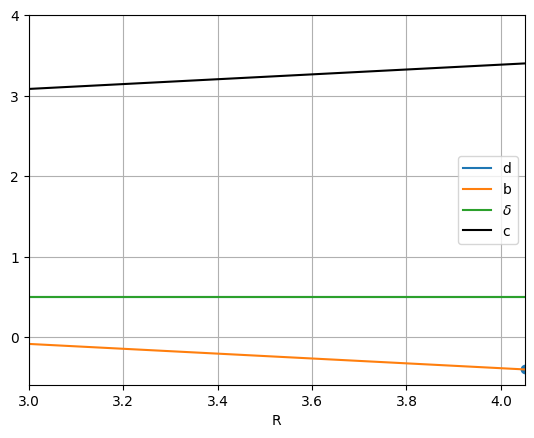

In [23]:
#this code generates the effective fitness curves. 
# b=1, d=1.5, c=2, δ are expressed in terms of the fitness matrix from the paper.
# Here, we vary W, compute the curves as well a track the b,c,d as W is varied. Then we plot and show 
X=np.linspace(0,1,100)

fig, (ax1) = plt.subplots(1,1,figsize=[7,5])

#Varying W
vals = np.exp(np.linspace(P,R-.25,4))
#Tracking coefficients as W is varied, and generating appropriate labels
Bs = [np.round(np.log(W/v),2) for v in vals]
blabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Cs = [np.round(np.log(v/P),2) for v in vals]
# clabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Ds = [np.round(np.log(R*P/(P*L)),2) for v in vals]
dlabels = [r'$,d=$'+str(D) for D in Ds]+[r'$\ln L$',r'$\ln R$']
Dels = [np.round(np.log(W/R),2) for v in vals]

#Plot aesthetics
line_order = [.9]+[.8 for i in vals]
pcolor=[(i-.15,0,i) for i in np.linspace(.2,.7,6)]
ycolor=[(.9,i-.1,.2-i/4) for i in np.linspace(.4,.7,6)]

#Plotting the fitness boundaries
plt.axhline(np.log(R),color='k',zorder=1,label=r'$\ln R$',c=pcolor[-1],linewidth=2)

#Plotting the fitness as a function of p
for L,bl,dl,yc,pc in  zip(vals,blabels,dlabels,ycolor,pcolor): 
    #Fancy way of computation
    plt.axhline(np.log(L),color='k',zorder=1,label=r'$\ln L='+str(np.round(np.log(L),2))+'$, '+bl,c=pc,linewidth=2)

lines = plt.gca().get_lines()
labelLines(lines)

for L,bl,dl,yc,pc in  zip(vals,blabels,dlabels,ycolor,pcolor): 

    pris  = np.array([[[L,P],[W,R]],[[L,W],[P,R]]])
    Y=[np.sum(np.log(pris[0])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]])\
              +np.log(pris[1])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]]))/2 for PP in X]
    plt.plot(X,Y,color=yc,linewidth=2)

#PLOTTING THE FILL REGIONS 
opti_domain = np.exp(np.linspace(np.log(.5),np.log(10000),100))
pstar = np.array([-np.log(W*P/LL**2)/(2*np.log(R*LL/(W*P))) for LL in opti_domain])
ystar = np.array([PS**2*np.log(R*LL/(W*P))+PS*np.log(W*P/LL**2)+np.log(LL) for PS,LL in zip(pstar,opti_domain)])
plt.plot(pstar,ystar,zorder=0,color=pcolor[3],linewidth=2)
plt.fill_between(pstar, [-10 for i in ystar], ystar, color=pcolor[2], alpha=0.2)

#Labels
plt.text(.025, -.3, 'C Phase', size=14, color=pcolor[4])
plt.text(.725, -.3, 'D Phase', size=14, color='w')
plt.text(.85, 1.25, 'c=2', size=14, color='k')


plt.ylim(-.5,1.5)
plt.xlim(0,1)
plt.xlabel(r'p',fontsize=14)
plt.ylabel(r'$\langle \ln w_s \rangle $',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid()
plt.savefig("phase_diagramLvary.pdf")
plt.show()
plt.plot(vals,Ds,label='d')
plt.plot(vals,Bs,label='b')
plt.scatter(vals,Bs)
plt.plot(vals,Dels,label=r'$\delta$')
plt.plot(vals,Cs,label='c',color='k')
plt.xlabel("R")
plt.xlim(left=3,right=vals[-1])

plt.ylim(top=4)
plt.legend()
plt.grid()
plt.show()

In [25]:
R=1.6487202567
L=1
W=2.7182818285
P=0.1353352832
PW=P*W

0.0
0.0
0.0
0.0
21.944091683588425
31.94293416948853
34.33004053687037
42.098318649637186


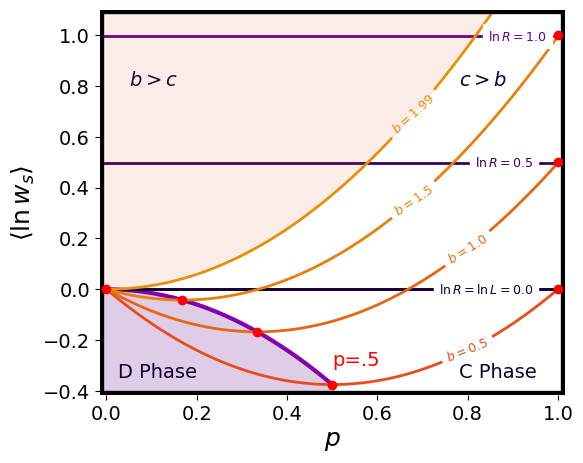

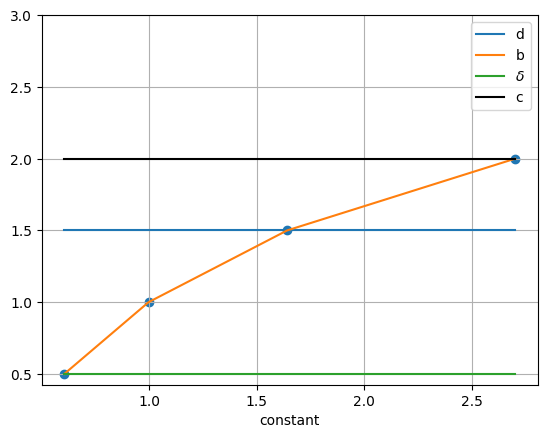

In [26]:
#this code generates the effective fitness curves. 
# b=1, d=1.5, c=2, δ are expressed in terms of the fitness matrix from the paper.
# Here, we vary W, compute the curves as well a track the b,c,d as W is varied. Then we plot and show 
X=np.linspace(0,1,100)

fig, (ax1) = plt.subplots(1,1,figsize=[6,5])

#Varying W
ms = np.exp(np.linspace(-.5,np.log(2.7),4))
#Tracking coefficients as W is varied, and generating appropriate labels
Bs = [np.round(np.log(W*v/L),2) for v in ms]
blabels = ([r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$'])[:-1]
Cs = [np.round(np.log(L/P),2) for v in ms]
# clabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Ds = [np.round(np.log(R*L/(P*W)),2) for v in ms]
dlabels = [r'$,d=$'+str(D) for D in Ds]+[r'$\ln L$',r'$\ln R$']
Dels = [np.round(np.log(W/R),2) for v in ms]

#Plot aesthetics
line_order = [.84,.88,.91,0]+[.8,.8,.68,.68]
pcolor=[(i-.15,0,i) for i in np.linspace(.2,.7,4)]
ycolor=[(.9,i-.1,.2-i/4) for i in np.linspace(.4,.7,4)]

#Plotting the fitness boundaries
plt.axhline(np.log(L),color='k',zorder=1,label=r'$\ln L=\ln R = 0.0$',c=pcolor[-1],linewidth=2)

#Plotting the fitness as a function of p
for m,bl,dl,pc in  zip(ms,blabels,dlabels,pcolor): 
    #Fancy way of computation
    if not m==ms[0]:
        plt.axhline(np.log(R*m),color='k',zorder=2,label=r'$\ln R='+str(np.absolute(np.round(np.log(R*m),2)))+'$',c=pc,linewidth=2)

    else:
        plt.axhline(np.log(R*m),color='k',zorder=2,label=r'$\ln R=\ln L='+str(np.absolute(np.round(np.log(R*m),2)))+'$',c=pc,linewidth=2)

#Plotting the fitness as a function of p
for m,bl,dl,c in  zip(ms,blabels,dlabels,ycolor): 

    pris  = np.array([[[L,P],[W*m,R*m]],[[L,W*m],[P,R*m]]])
    #Fancy way of computation
    Y=[np.sum(np.log(pris[0])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]])\
              +np.log(pris[1])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]]))/2 for PP in X]
    #Direct from equation
    plt.plot(X,Y,label=bl,color=c,linewidth=2,zorder=2.4)

lines = plt.gca().get_lines()
labelLines(lines[1:])

for m,bl,dl,c in  zip(ms,blabels,dlabels,ycolor): 
    if m==ms[-1]:
        plt.fill_between([-1]+X.tolist(),[1]+Y,[1.2]+[1.2 for y in Y],color=ycolor[0],alpha=.1,zorder=100)

#PLOTTING THE FILL REGIONS 
opti_domain = np.exp(np.linspace(np.log(.6),np.log(4),100))
pstar = np.array([-np.log(W*m*P/L**2)/(2*np.log(R*L/(W*P))) for m in opti_domain])
ystar = np.array([PS**2*np.log(R*L/(W*P))+PS*np.log(W*m*P/L**2)+np.log(L) for PS,m in zip(pstar,opti_domain)])
plt.plot(pstar,ystar,zorder=0,color=pcolor[3],linewidth=3)
plt.fill_between(pstar, [-2 for i in pstar], ystar, color=pcolor[2], alpha=0.2)

Bs = [.5,1,1.5,2]
pstar = np.array([(np.log(L/P)-b)/(2*np.log(R*L/(W*P))) for b in Bs])
ystar = np.array([PS**2*np.log(R*L/(W*P))+PS*(b-np.log(L/P))+np.log(L) for PS,b in zip(pstar,Bs)])
plt.scatter(pstar,ystar,color='r',zorder=500,linewidths=1)#facecolors='none'
plt.scatter([1,1,1],[0,.5,1],color='r',zorder=500,linewidths=1)#facecolors='none'


#Labels
plt.text(.78, -.35, 'C Phase', size=14, color=pcolor[0])
plt.text(.025, -.35, 'D Phase', size=14, color=pcolor[0])
plt.text(.05, .8, r'$b>c$', size=14, color=pcolor[0])
plt.text(.78, .8, r'$c>b$', size=14, color=pcolor[0])
plt.text(.5, -.3, 'p=.5', size=14, color='r')


plt.ylim(-.415,1.1)
plt.xlim(-.015,1.015)
plt.xlabel(r'$p$',fontsize=18)
plt.ylabel(r'$\langle \ln w_s \rangle $',fontsize=18)
# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.axhline(1.1, color='black', linewidth=border_thickness,zorder=100)  # Bottom border (x-axis)

plt.axhline(-.415, color='black', linewidth=border_thickness,zorder=100)  # Bottom border (x-axis)
plt.axvline(-.015, color='black', linewidth=border_thickness,zorder=100)  # Left border (y-axis)
plt.axvline(1.015, color='black', linewidth=border_thickness,zorder=100)  # Left border (y-axis)

plt.gca().set_frame_on(False)  # Remove default plot frame
plt.grid(False)  # Remove grid
# Save figure
plt.savefig("phase_diagramB1.pdf", dpi=300, bbox_inches='tight')
# plt.grid()
plt.show()
plt.plot(ms,Ds,label='d')
plt.plot(ms,Bs,label='b')

plt.scatter(ms,Bs)
plt.plot(ms,Dels,label=r'$\delta$')
plt.plot(ms,Cs,label='c',color='k')
plt.xlabel("constant")

plt.ylim(top=3)
plt.legend()
plt.grid()
plt.show()

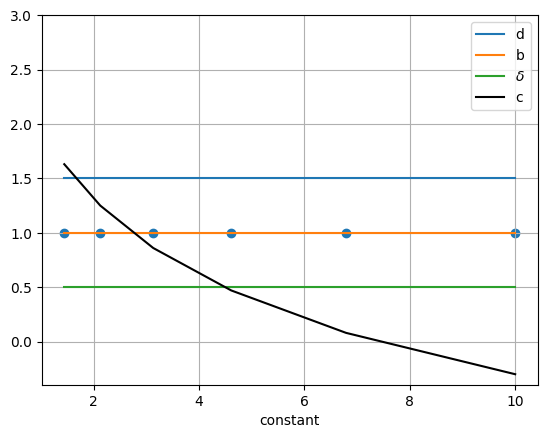

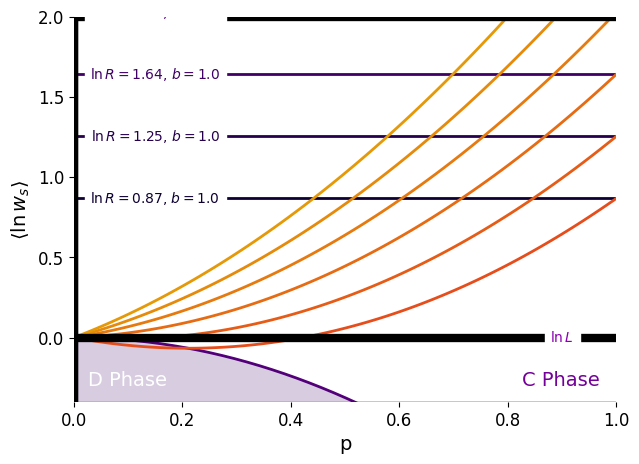

In [42]:
R=1.6487202567
L=1
W=2.7182818285
P=0.1353352832
PW=P*W
#this code generates the effective fitness curves. 
# b=1, d=1.5, c=2, δ are expressed in terms of the fitness matrix from the paper.
# Here, we vary W, compute the curves as well a track the b,c,d as W is varied. Then we plot and show 
X=np.linspace(0,1,100)


#Varying W
ms = np.exp(np.linspace(1./2.7182818285,np.log(10),6))
#Tracking coefficients as W is varied, and generating appropriate labels
Bs = [np.round(np.log(W/L),2) for v in ms]
blabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Cs = [np.round(np.log(L/(P*v)),2) for v in ms]
# clabels = [r'$b=$'+str(B) for B in Bs]+[r'$\ln L$',r'$\ln R$']
Ds = [np.round(np.log(R*L/(P*W)),2) for v in ms]
dlabels = [r'$,d=$'+str(D) for D in Ds]+[r'$\ln L$',r'$\ln R$']
Dels = [np.round(np.log(W/R),2) for v in ms]

plt.plot(ms,Ds,label='d')
plt.plot(ms,Bs,label='b')
plt.scatter(ms,Bs)
plt.plot(ms,Dels,label=r'$\delta$')
plt.plot(ms,Cs,label='c',color='k')
plt.xlabel("constant")

plt.ylim(top=3)
plt.legend()
plt.grid()
plt.show()

fig, (ax1) = plt.subplots(1,1,figsize=[7,5])


#Plot aesthetics
line_order = [.9]+[.15 for i in vals]
pcolor=[(i-.15,0,i) for i in np.linspace(.2,.7,6)]
ycolor=[(.9,i-.1,.2-i/4) for i in np.linspace(.4,.7,6)]

#Plotting the fitness boundaries
plt.axhline(np.log(L),color='k',zorder=1,label=r'$\ln L$',c=pcolor[-1],linewidth=2)

#Plotting the fitness as a function of p
for m,bl,dl,pc in  zip(ms,blabels,dlabels,pcolor): 
    #Fancy way of computation
    plt.axhline(np.log(R*m),color='k',zorder=1,label=r'$\ln R='+str(np.round(np.log(R*m),2))+'$, '+bl,c=pc,linewidth=2)

lines = plt.gca().get_lines()
labelLines(lines)

#Plotting the fitness as a function of p
for m,bl,dl,c in  zip(ms,blabels,dlabels,ycolor): 

    pris  = np.array([[[L,P],[W*m,R*m]],[[L,W*m],[P,R*m]]])
    #Fancy way of computation
    Y=[np.sum(np.log(pris[0])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]])\
              +np.log(pris[1])*np.array([[(1-PP)**2,PP*(1-PP)],[PP*(1-PP),PP**2]]))/2 for PP in X]
    #Direct from equation
    plt.plot(X,Y,label=bl+dl,color=c,linewidth=2)


#PLOTTING THE FILL REGIONS 
opti_domain = np.exp(np.linspace(np.log(.005),np.log(10),1000))
pstar = np.array([-np.log(W*m*P/L**2)/(2*np.log(R*L/(W*P))) for m in opti_domain])
ystar = np.array([PS**2*np.log(R*L/(W*P))+PS*np.log(W*m*P/L**2)+np.log(L) for PS,m in zip(pstar,opti_domain)])
plt.plot(pstar,ystar,zorder=0,color=pcolor[3],linewidth=2)
plt.fill_between(pstar, [-.4 for i in pstar], ystar, color=pcolor[2], alpha=0.2)

#Labels
plt.text(.825, -.3, 'C Phase', size=14, color=pcolor[4])
plt.text(.025, -.3, 'D Phase', size=14, color='w')
# plt.text(.05, 1.8, 'c=2', size=14, color='k')

plt.axhline(2, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame
plt.grid(False)  # Remove grid

plt.ylim(-.4,2)
plt.xlim(0,1)
plt.xlabel(r'p',fontsize=14)
plt.ylabel(r'$\langle \ln w_s \rangle $',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame
plt.grid(False)  # Remove grid

plt.savefig("phase_diagram.pdf")
plt.show()

$\ln w=w_0-c^\prime(q)s_1+b^\prime(q)s_2+ds_1s_2$

$c^\prime(e)=c(1-e)-be,c^\prime(e)=b(1-e)-ce$

$c^\prime(q)=c(1-q)-bq,c^\prime(q)=b(1-q)-cq$

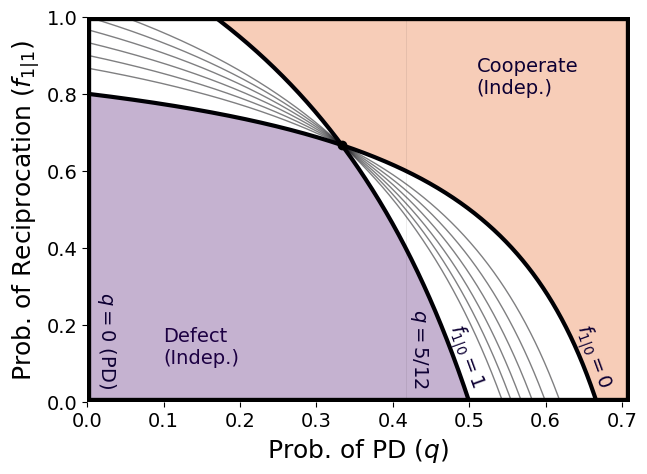

In [130]:
### Generate values for q and their fraction labels
f_values = [0,1/6,1/4,1/3,5/12,1/2,7/12,1]
q_values = np.linspace(0,.75,1000)
fraction_labels = ['0','1/6','1/4','1/3','5/12','1/2','7/12','1']  # Exact fraction strings

# Plot the figure with the magma colormap
fig, (ax1) = plt.subplots(1,1,figsize=[7,5])

# Generate colors using the magma colormap
colors = plt.cm.magma(np.linspace(0, 1, len(q_values)))  # Magma colormap

l0=None;l1=None
for i, f in enumerate(f_values):
    if np.isclose(q, 1):  # Skip plotting for q = 1 (not in q_values)
        continue
    
    cc_q = cc(q_values)
    bb_q = bb(q_values)
    
    # Compute y values
    y_values = (cc_q / (bb_q + d)) + (bb_q / (bb_q + d)) * f

    if len(x_valid) > 0:  # Only plot if there are valid y values
        linewidth = 4 if q == 0 else 3
        if i==0 or i == 7:
            plt.plot(q_values, y_values, linewidth=linewidth, color=colors[i],label = r'$f_{1|0} =$'+ fraction_labels[i])
        # elif i == 4:
        #     plt.plot(q_values, y_values, linewidth=linewidth, color='#C34E6E',label = r'$f_{1|0} =$'+ fraction_labels[i])
        else:
            plt.plot(q_values, y_values, linewidth=1, color=colors[i],label = r'$f_{1|0} =$'+ fraction_labels[i],alpha=.5)
   
    if i==0:
        l0=y_values
    if i==7:
        l1=y_values

# line_order = [.1 for i in q_values]
# lines = plt.gca().get_lines()
# labelLines(lines[1:-1]) 

l0special = l0[:444].tolist()+l1[444:].tolist()
plt.fill_between(q_values,[0 for i in l0special],l0special,color=pcolor[2],alpha=.3)

l1special = l1[:444].tolist()+l0[444:].tolist()

# plt.fill_between(q_values,[0 for i in l0special],l0special,color=pcolor[2],alpha=.2)
plt.fill_between(q_values,[1 for i in l1special],l1special,color=ycolor[1],alpha=.3)

# Set axis limits
plt.xlim(0, .71)
plt.ylim(0, 1)

# Add thicker frame around the plot
border_thickness = 6


# Plot formatting
plt.xlabel("Prob. of PD $(q)$", fontsize=18)
plt.ylabel("Prob. of Reciprocation $(f_{1|1})$", fontsize=18)
plt.axvline(.71, color="black", linewidth=border_thickness)  # Right border
plt.axhline(1, color="black", linewidth=border_thickness)  # Top border
plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.axvline(5/12, linewidth=.5, color='k',alpha=.1)
plt.gca().set_frame_on(False)  # Remove default plot fram
plt.grid(False)  # Remove grid

# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.scatter([1/3],[2/3],color='k',zorder=500,linewidths=1)#facecolors='none'


plt.text(.1, .1, 'Defect\n(Indep.)', size=14, color=pcolor[0],zorder=0)
plt.text(.51, .8, 'Cooperate\n(Indep.)', size=14, color=pcolor[0])
# plt.text(.05, .85, r'Dependent', size=14, color=pcolor[0]
# plt.text(.1, .85, 'Mixed', size=14, color=pcolor[0])


plt.text(.63, .05, r'$f_{1|0}=0$', size=14, color=pcolor[0],rotation=290.1)
plt.text(.465, .05, r'$f_{1|0}=1$', size=14, color=pcolor[0],rotation=290.1)
plt.text(.42, .05, r'$q=5/12$', size=14, color=pcolor[0],rotation=270)
plt.text(0.01, .05, r'$q=0$ (PD)', size=14, color=pcolor[0],rotation=270)




# Save figure
plt.savefig("Mixed_game_phase_diagram_simple.pdf", dpi=300, bbox_inches='tight')

# Print q threshold where y(x) < 0 for all x
# print(f"q threshold where y(x) < 0 for all x: {q_threshold_negative:.5f}")

# Show plot
plt.show()

it can be shown that $W=\frac{L^{2(1-p_\ast)}}{P}$ and $p_\ast=1-\frac{\ln WP}{\ln L^2}$

It follows that

$\langle\ln w_s\rangle=p^2\ln RL^{2p-3}+\ln L$

In [117]:
# Generate colors using the magma colormap
colors = plt.cm.magma(np.linspace(0, 1, len(q_values)))  # Magma colormap
spec_color = colors[4]

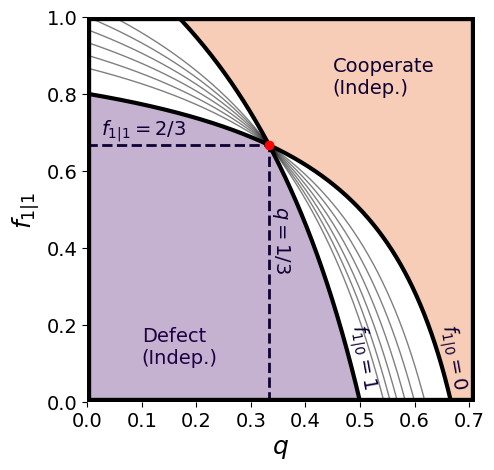

In [129]:
### Generate values for q and their fraction labels
f_values = [0,1/6,1/4,1/3,5/12,1/2,7/12,1]
q_values = np.linspace(0,.75,1000)
fraction_labels = ['0','1/6','1/4','1/3','5/12','1/2','7/12','1']  # Exact fraction strings

# Plot the figure with the magma colormap
fig, (ax1) = plt.subplots(1,1,figsize=[5,5])



line_order = [.25 for i in q_values]

l0=None;l1=None
for i, f in enumerate(f_values):
    if np.isclose(q, 1):  # Skip plotting for q = 1 (not in q_values)
        continue
    
    cc_q = cc(q_values)
    bb_q = bb(q_values)
    
    # Compute y values
    y_values = (cc_q / (bb_q + d)) + (bb_q / (bb_q + d)) * f

    if len(x_valid) > 0:  # Only plot if there are valid y values
        linewidth = 4 if q == 0 else 3
        if i==0 or i == 7:
            plt.plot(q_values, y_values, linewidth=linewidth, color='k',label = r'$f_{1|0} =$'+ fraction_labels[i])
        else:
            plt.plot(q_values, y_values, linewidth=1, color='k',label = r'$f_{1|0} =$'+ fraction_labels[i],alpha=.5)
    
    if i==0:
        l0=y_values
    if i==7:
        l1=y_values

l0special = l0[:444].tolist()+l1[444:].tolist()
plt.fill_between(q_values,[0 for i in l0special],l0special,color=pcolor[2],alpha=.3)

l1special = l1[:444].tolist()+l0[444:].tolist()
plt.fill_between(q_values,[1 for i in l1special],l1special,color=ycolor[1],alpha=.3)

# Set axis limits
plt.xlim(0, .71)
plt.ylim(0, 1)

# Add thicker frame around the plot
border_thickness = 6

plt.plot([1/3,1/3],[0,2/3],linestyle='dashed',color=pcolor[0],linewidth=2,zorder=1)
plt.plot([0,1/3],[2/3,2/3],linestyle='dashed',color=pcolor[0],linewidth=2,zorder=1)
plt.text(.335, .35, r'$q=1/3$', size=14, color=pcolor[0],rotation=270)
plt.text(.025, .695, r'$f_{1|1}=2/3$', size=14, color=pcolor[0])


# Plot formatting
plt.xlabel("$q$", fontsize=20)
plt.ylabel("$f_{1|1}$", fontsize=20)
plt.xlabel("$q$", fontsize=18)
plt.ylabel("$f_{1|1}$", fontsize=18)
plt.axvline(.71, color="black", linewidth=border_thickness)  # Right border
plt.axhline(1, color="black", linewidth=border_thickness)  # Top border
plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot fram
plt.grid(False)  # Remove grid

# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.scatter([1/3],[2/3],color='r',zorder=500,linewidths=1)#facecolors='none'


plt.text(.1, .1, 'Defect\n(Indep.)', size=14, color=pcolor[0],zorder=0)
plt.text(.45, .8, 'Cooperate\n(Indep.)', size=14, color=pcolor[0])

plt.text(.635, .05, r'$f_{1|0}=0$', size=14, color=pcolor[0],rotation=280.1)
plt.text(.47, .05, r'$f_{1|0}=1$', size=14, color=pcolor[0],rotation=280.1)

# Save figure
plt.savefig("Mixed_game_phase_diagram.pdf", dpi=300, bbox_inches='tight')

# Print q threshold where y(x) < 0 for all x
# print(f"q threshold where y(x) < 0 for all x: {q_threshold_negative:.5f}")

# Show plot
plt.show()

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define constants
c = 2
b = 1
d = 1.5

# Define functions
def cc(q):
    return c * (1 - q) - b * q

def bb(q):
    return b * (1 - q) - c * q

18.323982313835682
11.694462133061823
6.745579647552145
0.0
-9.402368502400336
-22.488503054668023
-39.62329457204727
x label location is outside data range!


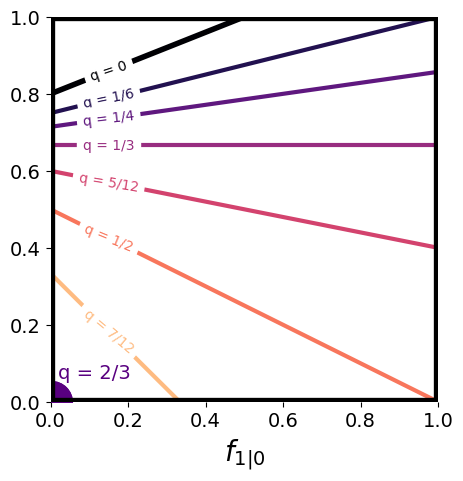

In [122]:
# Generate values for q and their fraction labels
q_values = [0, 1/6, 1/4, 1/3, 5/12, 1/2, 7/12, 2/3]
fraction_labels = ['0', '1/6', '1/4', '1/3', '5/12', '1/2', '7/12', '2/3']  # Exact fraction strings

# Generate x values
x_values = np.linspace(0, 1, 100)

# Plot the figure with the magma colormap
fig, (ax1) = plt.subplots(1,1,figsize=[5,5])

# Generate colors using the magma colormap
colors = plt.cm.magma(np.linspace(0, 1, len(q_values)))  # Magma colormap

for i, q in enumerate(q_values):
    if np.isclose(q, 1):  # Skip plotting for q = 1 (not in q_values)
        continue
    
    cc_q = cc(q)
    bb_q = bb(q)
    
    # Compute y values
    y_values = (cc_q / (bb_q + d)) + (bb_q / (bb_q + d)) * x_values
    
    # Mask values where y < 0
    valid_mask = y_values >= 0
    x_valid = x_values[valid_mask]
    y_valid = y_values[valid_mask]
    
    if len(x_valid) > 0:  # Only plot if there are valid y values
        linewidth = 4 if q == 0 else 3
        plt.plot(x_valid, y_valid, linewidth=linewidth, color=colors[i],label = f'q = {fraction_labels[i]}')
line_order = [.15 for i in q_values]
lines = plt.gca().get_lines()
labelLines(lines)

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add thicker frame around the plot
border_thickness = 6

plt.plot([0, 0], [0, 0], 'o', ms=30, color=pcolor[3])  # Point at origin
plt.text(0.02, 0.05, 'q = 2/3', fontsize=14, color=pcolor[3], 
         ha='left', va='bottom')  # Label at origin

# Plot formatting
plt.xlabel("$f_{1|0}$", fontsize=20)
# plt.ylabel("$f_{1|1}$", fontsize=20)
plt.axvline(1, color="black", linewidth=border_thickness)  # Right border
plt.axhline(1, color="black", linewidth=border_thickness)  # Top border
plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame
plt.grid(False)  # Remove grid

# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

# Save figure
plt.savefig("Mixed_game_phase_diagram0.pdf", dpi=300, bbox_inches='tight')

# Print q threshold where y(x) < 0 for all x
# print(f"q threshold where y(x) < 0 for all x: {q_threshold_negative:.5f}")

# Show plot
plt.show()

In [123]:
cc_q = cc(1/3)
bb_q = bb(1/3)

# Compute y value
(cc_q / (bb_q + d)) + (bb_q / (bb_q + d)) 

0.666666666666667

In [20]:
from math import atan2,degrees
import numpy as np

#Label line with line2D label data
def labelLine(line,x,label=None,align=True,**kwargs):

    ax = line.axes
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if (x < xdata[0]) or (x > xdata[-1]):
        print('x label location is outside data range!')
        return

    #Find corresponding y co-ordinate and angle of the line
    ip = 1
    for i in range(len(xdata)):
        if x < xdata[i]:
            ip = i
            break

    y = ydata[ip-1] + (ydata[ip]-ydata[ip-1])*(x-xdata[ip-1])/(xdata[ip]-xdata[ip-1])

    if not label:
        label = line.get_label()

    if align:
        #Compute the slope
        dx = xdata[ip] - xdata[ip-1]
        dy = ydata[ip] - ydata[ip-1]
        ang = degrees(atan2(dy,dx))

        #Transform to screen co-ordinates
        pt = np.array([x,y]).reshape((1,2))
        trans_angle = ax.transData.transform_angles(np.array((ang,)),pt)[0]

    else:
        trans_angle = 0

    #Set a bunch of keyword arguments
    if 'color' not in kwargs:
        kwargs['color'] = line.get_color()

    if ('horizontalalignment' not in kwargs) and ('ha' not in kwargs):
        kwargs['ha'] = 'center'

    if ('verticalalignment' not in kwargs) and ('va' not in kwargs):
        kwargs['va'] = 'center'

    if 'backgroundcolor' not in kwargs:
        kwargs['backgroundcolor'] = ax.get_facecolor()

    if 'clip_on' not in kwargs:
        kwargs['clip_on'] = True

    if 'zorder' not in kwargs:
        kwargs['zorder'] = 2.5

    if 'fontsize' not in kwargs:
        kwargs['fontsize'] = 9
    print(trans_angle)
    ax.text(x,y,label,rotation=trans_angle,**kwargs)

def labelLines(lines,align=True,xvals=None,**kwargs):

    global line_order
    
    ax = lines[0].axes
    labLines = []
    labels = []

    #Take only the lines which have labels other than the default ones
    for line in lines:
        label = line.get_label()
        if "_line" not in label:
            labLines.append(line)
            labels.append(label)

    if xvals is None:
        xmin,xmax = ax.get_xlim()
        xvals = line_order

    for line,x,label in zip(labLines,xvals,labels):
        labelLine(line,x,label,align,**kwargs)


In [6]:
colors =  plt.cm.magma(np.linspace(.1, .85, 5))  # Magma colormap
pcolor=[(i-.15,0,i) for i in np.linspace(.2,.7,6)]
ycolor=[(.9,i-.1,.2-i/4) for i in np.linspace(.4,.7,6)]
border_thickness = 6


0
1
2
3
4
-61.14776166252128
-65.41000303323267
-71.8066454151772
-77.34653236165724
-85.11773342846594


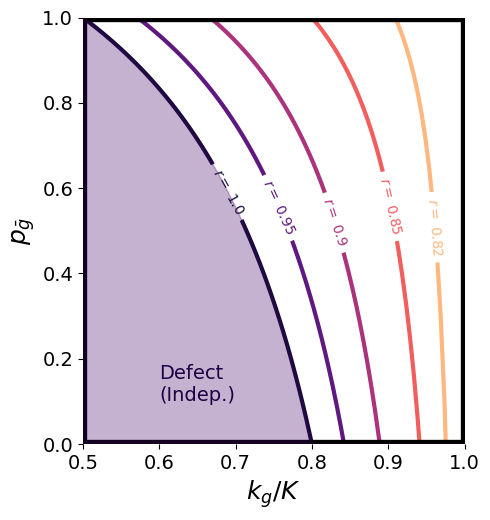

In [8]:
# Parameters (fixed)
f10 = 0.00 # This is f_{1|0}: as this increases the condition for cooperation becomes more difficul: curves move to the right.
b = 1
c = 2
d = 1.5



# Define the function y(x, r)
def y(x, r):
    return (c - x * (r * b + (r-f10) * d)) / (d * (1 - x))

# Generate x values between 0 and 1 (avoid x=1 to prevent division by zero)
x_values = np.linspace(.5, 0.999, 100)

# Define a list of r values to plot
r_values = [1.0, 0.95, 0.9, 0.85,.82]  # Example values, starting at r=1

# Plot y(x) for each value of r
datas = []

fig, (ax1) = plt.subplots(1,1,figsize=[5,5.3])

for i,r in enumerate(r_values):
    
    y_values = y(x_values, r)

    # Mask values where y < 0
    valid_mask = y_values >= 0
    x_valid = x_values[valid_mask]
    y_valid = y_values[valid_mask]
    
    datas.append(y_values)
    if len(x_valid) > 0:  # Only plot if there are valid y values
        print(i)
        plt.plot(x_values, y_values, label=f'$r =$ {r}', linewidth=3, color=colors[i])



l0special = datas[0]


# Plot formatting
plt.ylabel("$f_{1|1}$", fontsize=20)
plt.axvline(1, color="black", linewidth=border_thickness)  # Right border
plt.axhline(1, color="black", linewidth=border_thickness)  # Top border
plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0.5, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame

plt.text(.6, .1, 'Defect\n(Indep.)', size=14, color=pcolor[0],zorder=0)



# # Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.xlabel(r'$k_g/K$',fontsize=18)
plt.ylabel(r'$p_{\bar g}$',fontsize=18)
plt.xlim(0.5, 1)
plt.ylim(0, 1)  # Adjust y-axis limits based on the function's range
#plt.grid(True)

line_order = [.69,.757,.83,.903,.961]
lines = plt.gca().get_lines()
labelLines(lines)

plt.fill_between(x_values,[0 for i in x_values],l0special,color=pcolor[2],alpha=.3,zorder=100)


plt.tight_layout()
plt.savefig('selection_in_groups.pdf')
plt.show()


In [97]:
colors

array([[9.94738e-01, 6.24350e-01, 4.27397e-01, 1.00000e+00],
       [9.17689e-01, 3.35500e-01, 3.79915e-01, 1.00000e+00],
       [6.77786e-01, 2.02203e-01, 4.85819e-01, 1.00000e+00],
       [4.20791e-01, 1.12920e-01, 5.05215e-01, 1.00000e+00],
       [1.59018e-01, 6.83540e-02, 3.52688e-01, 1.00000e+00],
       [1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00]])

-66.45676473476969
-45.568575499709475
-30.369630024359708
-15.850861648803672
0.0
-80.72037106748064


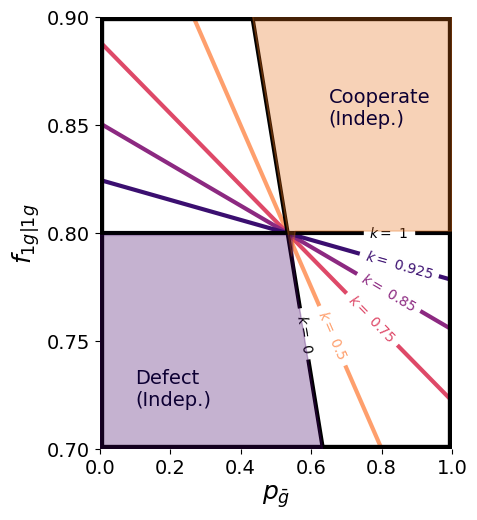

In [9]:
# Define a list of r values to plot
k_values = [0,.5,.75,.85,.925,1]  # Example values, starting at r=1
colors = np.flip(plt.cm.magma(np.linspace(0, .8, len(k_values)-1)),axis=0)  # Magma colormap
# Parameters (fixed)
f10 = 0.0 # This is f_{1|0}: as this increases the condition for cooperation becomes more difficul: curves move to the right.
b = 1
c = 2
d = 1.5

k = 1

fig, (ax1) = plt.subplots(1,1,figsize=[5,5.3])


# Define the function y(x, r)
def y(x, k):
    return (c - d * x * (1 - k) +k * f10) / (k + d)

# Generate x values between 0 and 1 (avoid x=1 to prevent division by zero)
x_values = np.linspace(0, 0.999, 100)


datas = []
# Plot y(x) for each value of r
for i,k in enumerate(k_values[1:]):

    y_values = y(x_values, k)
    datas.append(y_values)
    plt.plot(x_values, y_values, label=f'$k=$ {k}', linewidth=3, color=colors[i])

y_values = y(x_values, k_values[0])
datas = [y_values] + datas
plt.plot(x_values, y_values, label=f'$k=$ {k_values[0]}', linewidth=3, color='k')

# Add labels, title, and grid
#plt.title('Plot of y(x) for Different Values of r')





# Plot formatting
# plt.ylabel("$f_{1|1}$", fontsize=20)
plt.axvline(1, color="black", linewidth=border_thickness)  # Right border
plt.axhline(.9, color="black", linewidth=border_thickness)  # Top border
plt.axhline(.7, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(0, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame

# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.ylabel(r'$f_{1g|1g}$',fontsize=18)
plt.xlabel(r'$p_{\bar g}$',fontsize=18)
plt.xlim(0, 1)
plt.ylim(0.7, .9)  # Adjust y-axis limits based on the function's range
#plt.grid(True)
plt.tight_layout()

line_order = [.66,.7725,.82,.85,.82,.58]
lines = plt.gca().get_lines()
labelLines(lines)

l0special = np.array(datas[0][:55].tolist()+datas[-1][55:].tolist())
plt.fill_between(x_values,[1 for i in l0special],l0special+.001,color=ycolor[2],alpha=.3,zorder=100)

l1special = np.array(datas[-1][:55].tolist()+datas[0][55:].tolist())
plt.fill_between(x_values,[0 for i in l1special],l1special-.001,color=pcolor[2],alpha=.3,zorder=100)

plt.text(.1, .72, 'Defect\n(Indep.)', size=14, color=pcolor[0],zorder=101)
plt.text(.65, .85, 'Cooperate\n(Indep.)', size=14, color=pcolor[0],zorder=101)
ax1.set_yticks([0.7, 0.75, 0.8, 0.85, 0.9])

plt.savefig('grous_prob.pdf')
plt.show()


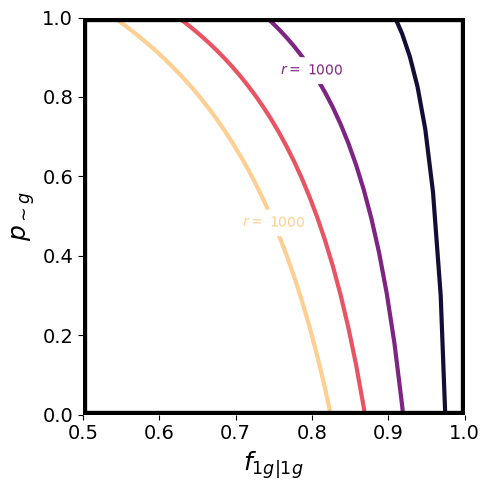

In [286]:
# Parameters (fixed)
f10 = 0.05 # This is f_{1|0}: as this increases the condition for cooperation becomes more difficul: curves move to the right.
b = 1
c = 2
d = 1.5
k = .25
r = 1

fig, (ax1) = plt.subplots(1,1,figsize=[5,5])


# Define the function y(x, r)
def ptilde(x, k):
    return (c - d * (1 - k) * x + k * r * b) / (k * d)

# Generate x values between 0 and 1 (avoid x=1 to prevent division by zero)
x_values = np.linspace(0, 0.999, 100)

# Define a list of r values to plot
k_values = [.85,.9,.95,1]  # Example values, starting at r=1

# Plot y(x) for each value of r
for i,k in enumerate(k_values):
    
    y_values = y(x_values, k)
    plt.plot(x_values, y_values, label=f'$r =$ {r}', linewidth=linewidth, color=colors[i])

# Add labels, title, and grid
#plt.title('Plot of y(x) for Different Values of r')

line_order = [.7,.8,.9,.75]
lines = plt.gca().get_lines()
labelLines(lines)

# Plot formatting
# plt.ylabel("$f_{1|1}$", fontsize=20)
plt.axvline(1, color="black", linewidth=border_thickness)  # Right border
plt.axhline(1, color="black", linewidth=border_thickness)  # Top border
plt.axhline(0, color='black', linewidth=border_thickness)  # Bottom border (x-axis)
plt.axvline(.5, color='black', linewidth=border_thickness)  # Left border (y-axis)
plt.gca().set_frame_on(False)  # Remove default plot frame

# Increase the size of the axis ticks
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.xlabel(r'$f_{1g|1g}$',fontsize=18)
plt.ylabel(r'$p_{\sim g}$',fontsize=18)
plt.xlim(.5, 1)
plt.ylim(0, 1)  # Adjust y-axis limits based on the function's range
#plt.grid(True)
plt.tight_layout()
plt.savefig('selection_in_groups.pdf')
plt.show()

### Attempt to implement cooperation

In [139]:
R=6.
L=2.
P=1.
W=7.
steps=50

pris  = np.array([[[L,P],[W,R]],[[L,W],[P,R]]])
pris2 = np.sqrt(np.array([[L*L,L*L],[P*W,W*P],[P*W,W*P],[R*R,R*R]]))

In [140]:
SAMPLES = 1500

def runPDMix2(title,pE_curr=[0,1]):

    A=1
    ps=.26
    p_s_temp = np.array([ps,ps,ps,ps])
    p_e_temp = np.array([.25,.25,.25,.25])

    data = []
    envs = []

    #Generates environment sequences
    for i in range(SAMPLES):
        data.append(np.random.choice([0,1], size=steps, p=pE_curr))
        envs.append([pris2[d] for d in data[-1]])
    pcurve = []
    mcurve = []

    for env,d in zip(envs,data):

        p_s_e = []
        p_s   = []
        p_e   = []

        p_e_marg = []

        #ATTEMPT 3
        likelihood = np.cumprod(env,axis=0)
        numerator = likelihood*p_s_temp[:,np.newaxis]
        # print(numerator[:3])
        denominator = np.sum(numerator,axis=1)
        # print(denominator[:3])
        
        p_s_e = [n/d for n,d in zip(numerator,denominator)]

        # print(p_s_e[:3])
        # input()
        
        for post in p_s_e:    
                
            p_s_unnormed =np.sum(post*p_e_temp,axis=1)
            p_s.append(p_s_unnormed/np.sum(p_s_unnormed))
    
        
            p_e.append(p_e_temp)
        
        pcurve.append(p_s_e)
        mcurve.append(p_s)

    return pcurve,mcurve,p_e,np.transpose(p_s)

#Processes and plots the mixed game 
def ProcAndPlotPDANDPT2(title,pcurve,mcurve,p_e,plot=True):
    
    # break up mean into 4 parts to reduce noise 
    # pcurve=[np.mean(pcurve[0:int(SAMPLES/4)],axis=0),np.mean(pcurve[int(SAMPLES/4):2*int(SAMPLES/4)],axis=0),\
    #         np.mean(pcurve[2*int(SAMPLES/4):3*int(SAMPLES/4)],axis=0),np.mean(pcurve[3*int(SAMPLES/4):SAMPLES],axis=0)]

    mntraj=np.transpose(np.mean(pcurve,axis=0),(1,2,0))
    lnmntraj=np.transpose(np.mean(np.log(pcurve),axis=0),(1,2,0))
    
    if plot:
    
        fig, (ax1, ax2) = plt.subplots(2,1,figsize=[4,6])
    
        clrs1 = [['#501669','#501669'],['#EB9437','#EB9437']]
        clrs = [['#4e4054','#4e4054'],['#e0bd96','#e0bd96']]
        stls = [['dashed','solid'],['dashed','solid']]
        lbls = [[['D','D'],['D','C']],[['C','D'],['C','C']]]
        
        for p_s_e,p_s,i in zip(pcurve,mcurve,range(SAMPLES)):          
            pse_time = np.transpose(p_s_e,(1,2,0))
            
            x=np.linspace(1,steps,steps)
    
            for pp,lbl,clr,stl in zip(pse_time,lbls,clrs,stls):
                for p,l,c,s in zip(pp,lbl,clr,stl):
                    ax1.plot(x,p,color=c,linestyle=s,linewidth=1,alpha=.3)
    
        for mn,clr,stl,lbl in zip(mntraj,clrs1,stls,lbls):
            for m,c,s,l in zip(mn,clr,stl,lbl):
                ax1.plot(x,m,color='w',linestyle=s,linewidth=4.5)
                ax1.plot(x,m,color=c,linestyle=s,linewidth=3,label=r'$P(s=$'+l[0]+r'$|e=$'+l[1]+r'$)$',alpha=.8)
    
    
    
        ax2.plot(x,np.transpose(p_e)[1],color='#501669', label=r'$P(e=C)$')
        ax2.plot(x,np.transpose(p_s)[1],color='#EB9437',label=r'$P(s=C)$')
        ax2.plot(x,np.transpose(p_e)[0],color='#501669',linestyle='dashed', label=r'$P(e=D)$')
        ax2.plot(x,np.transpose(p_s)[0],color='#EB9437',linestyle='dashed',label=r'$P(s=D)$')
        ax2.set_xlabel("Steps");ax1.set_ylabel('Probability');ax2.set_ylabel('Probability')
        ax1.grid();ax2.grid()
        # ax1.legend();
        ax2.legend()
        plt.tight_layout()
        plt.savefig(title+".pdf")
    return lnmntraj

In [141]:
pE=[1,0]
pc,mc,p_e_PDMix,p_s_PDMIX = runPDMix2('mixedGameCoop',pE)

ValueError: operands could not be broadcast together with shapes (50,2) (4,1) 

In [136]:
mnt = ProcAndPlotPDANDPT('mixedGameCoopUNBALANCED',pc,mc,p_e_PDMix,True) 

NameError: name 'ProcAndPlotPDANDPT2' is not defined

### ATTEMPT 2

In [1620]:
R=6.
L=2.
P=1.
W=7.
steps=50

# pris = np.array([[[L,P],[W,R]],[[L,W],[P,R]]])
# pris = np.array([[[8,2],[4,5]],[[5,3],[3,10]]])/5
pris = np.array([[[5,2],[2,5]],[[1,3],[3,1]]])/5

In [1621]:
#To marginalize on s, sum over 0 axis, leeaving the p axis

def runTAAndPlot(title,game,p_S1,p_S2,p_E):


    p_s_e = []
    
    env = np.array([pris for i in range(steps)])
    
    #ATTEMPT 3
    likelihood = np.cumprod(env,axis=0)
    numerator = likelihood*p_S1
    denominator = np.sum(numerator,axis=2)
    p_s_e = [n/d for n,d in zip(numerator,denominator[:,:,np.newaxis])]
    for l,i in zip(np.transpose(p_s_e,(1,2,3,0)),['|Coord 1','|Coord 2']):
        for ll,j in zip(l,['D','C']):
            for lll,k in zip(ll,['D','C']):
                plt.plot(lll,label=j+k+i)
    plt.legend()

    return p_s_e
    

def genNormedDistr(pris):
    norm = np.sum(pris,axis=1)
    pris = pris/norm[:,np.newaxis]
    return pris

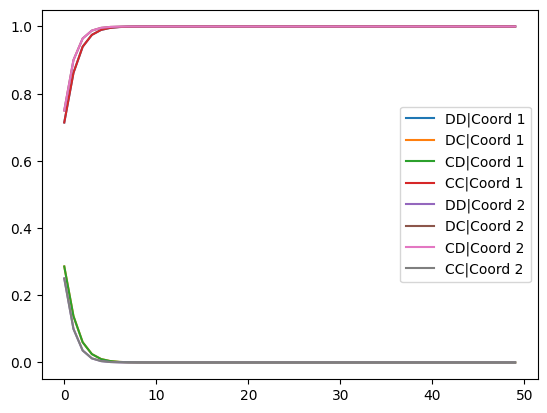

In [1622]:
pE=.5
pS1=.5
pS2=.5
p_E = np.array([pE,1-pE])
p_S1 = np.array([pS1,1-pS1])[:,np.newaxis]
p_S2 = np.array([pS2,1-pS2])[np.newaxis]
posterior = runTAAndPlot('bu','c',p_S1,p_S2,p_E)

In [1623]:
jointEPP=[p*p_S2*p_E for p in posterior]                       # Joint E P1 P2
jointPPGE=[p*p_S2 for p in posterior]                          # Joint P1 P2 | E
jointPP=[np.sum(j,axis=0) for j in jointEPP]                   # Joint P1 P2
marg1 =[np.sum(j,axis=1) for j in jointPP]                     # Marg P1
marg1G2=[np.sum(p*p_E,axis=0) for p in posterior]              # Marg P1 | P2    
marg1GE=[np.sum(p,axis=2)[:,:,np.newaxis] for p in jointPPGE]  # Marg P1 | E

In [1624]:
hs1=-np.sum(np.transpose(marg1*np.log(marg1),(1,0)),axis=0) #H(s1|s2)
hs1Gs2=-np.sum(np.sum(np.transpose(jointPP*np.log(marg1G2),(1,2,0)),axis=0),axis=0) #H(s1|s2)

In [1625]:
is1s2=[np.divide(ssg,s) for ssg,s in zip(marg1G2,marg1)]                        #P(S1|S2)/P(S1)
Is1s2=np.sum(np.sum(np.transpose(jointPP*np.log(is1s2),(1,2,0)),axis=0),axis=0) #I(S1;S2)

In [1626]:
is1s2Ge=[np.divide(sse,s) for sse,s in zip(posterior,marg1GE)]                  #P(S1|S2,E)/P(S1|E)
Is1s2Ge=np.sum(np.sum(np.sum(np.transpose(jointEPP*np.log(is1s2Ge),(1,2,3,0)),axis=0),axis=0),axis=0) #I(S1;S2|E)

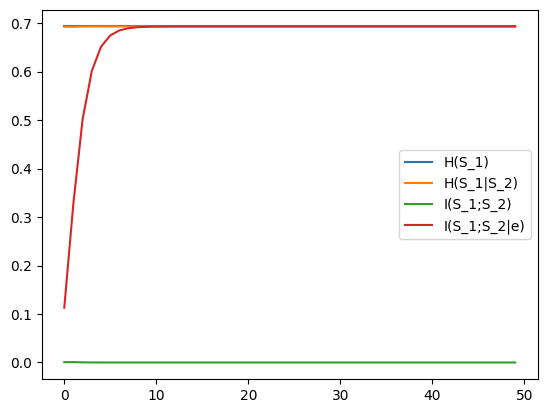

In [1627]:
plt.plot(hs1,label='H(S_1)')
plt.plot(hs1Gs2,label='H(S_1|S_2)')
plt.plot(Is1s2,label='I(S_1;S_2)')
plt.plot(Is1s2Ge,label='I(S_1;S_2|e)')
plt.legend();plt.show()